# Load the data set

In [144]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv("D:/Data Science Project 1/insurance.csv")

# Inspect the dataset
print(data.head())
print(data.info())
print(data.describe())
print(data.columns)


   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mea

# Removing Duplicate Columns

In [146]:
# Drop duplicate columns if any
data = data.loc[:, ~data.columns.duplicated()]
print(data.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


In [147]:
# Convert categorical features into numerical factors
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# Convert region to dummy variables and drop one to avoid multicollinearity
data = pd.get_dummies(data, columns=['region'], drop_first=True)
print(data.head())


   age  sex   bmi  children  smoker  expenses  region_northwest  \
0   19    0  27.9         0       1  16884.92             False   
1   18    1  33.8         1       0   1725.55             False   
2   28    1  33.0         3       0   4449.46             False   
3   33    1  22.7         0       0  21984.47              True   
4   32    1  28.9         0       0   3866.86              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


# Encoding Categorical Features

In [149]:
from sklearn.impute import SimpleImputer

# Check for any missing values
print(data.isnull().sum())

# Handle missing values
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
print(data.isnull().sum())  # Confirm no more missing values


age                 0
sex                 0
bmi                 0
children            0
smoker              0
expenses            0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
age                 0
sex                 0
bmi                 0
children            0
smoker              0
expenses            0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


# Exploratory Data Analysis (EDA)

### 1. Distribution of Numerical Features
We'll plot histograms for numerical features to understand their distributions.

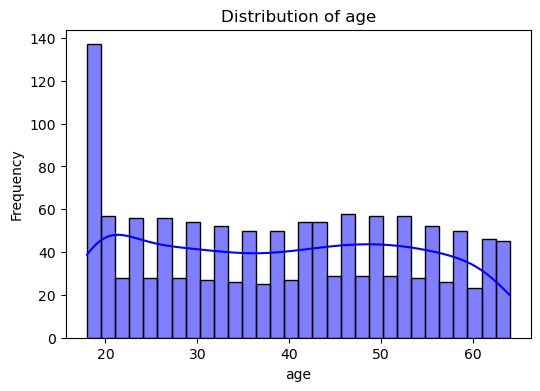

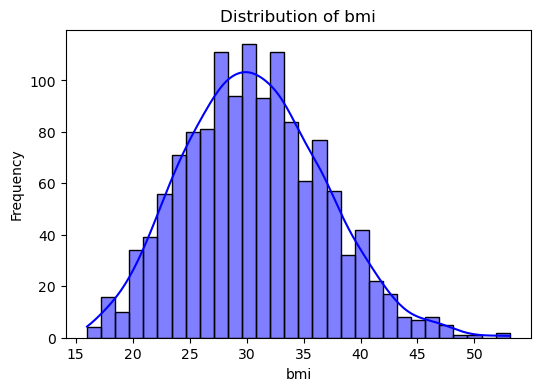

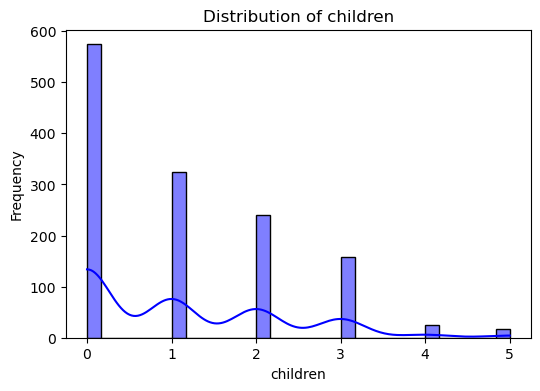

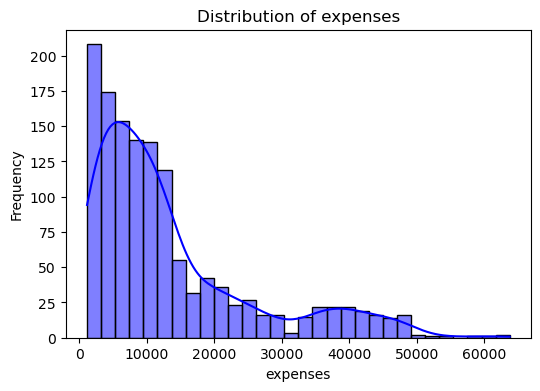

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_cols = ['age', 'bmi', 'children', 'expenses']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### 2. Correlation Analysis
We'll create a heatmap to visualize correlations between numerical features.

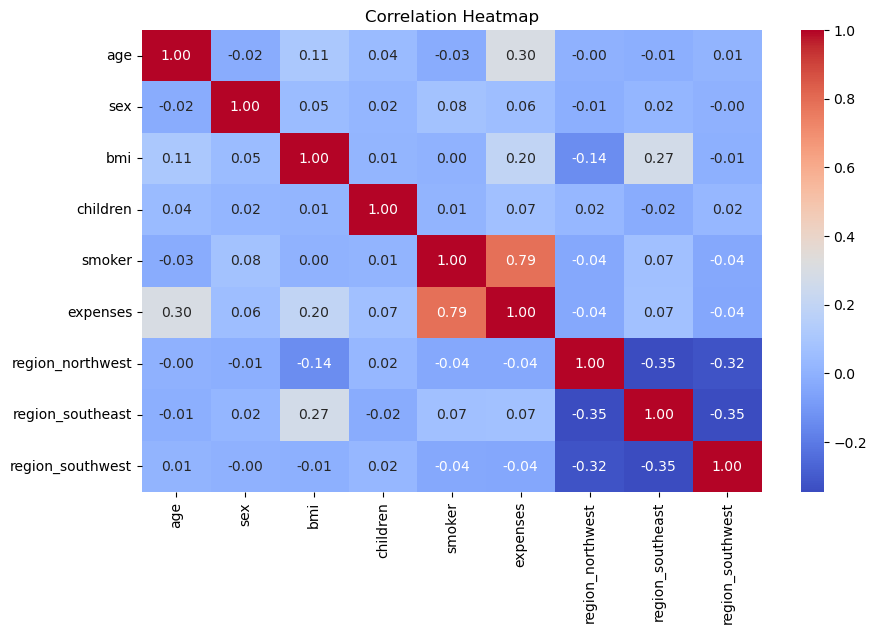

In [154]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### 3. Relationship Between Features and Expenses
We'll analyze how individual features affect the target variable `expenses`.

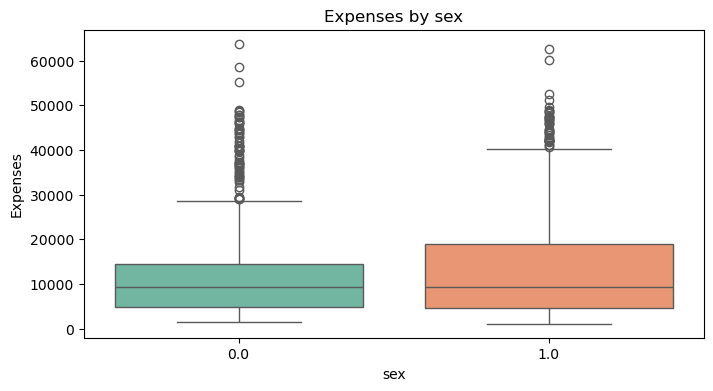

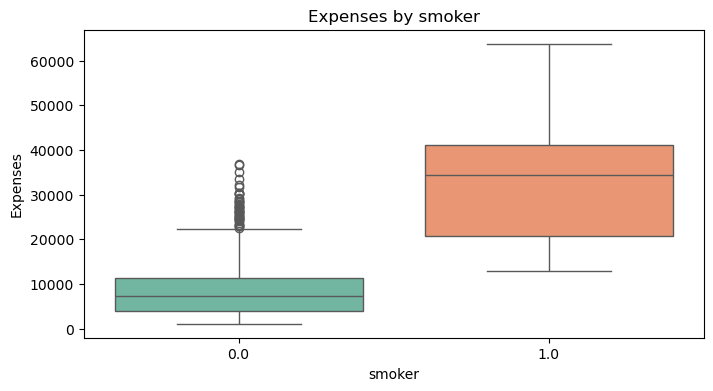

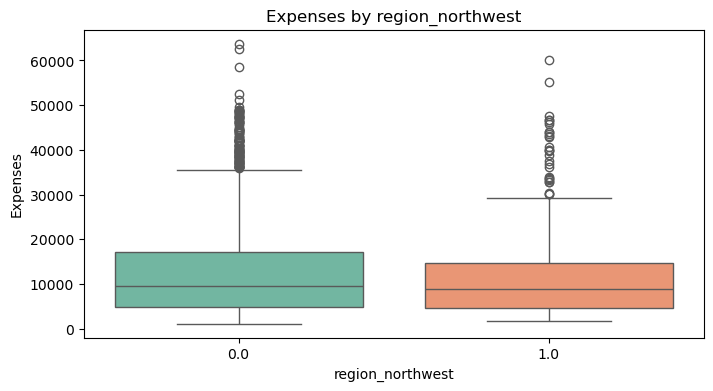

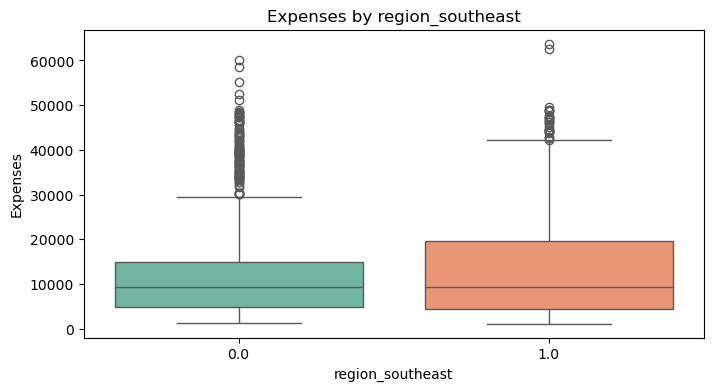

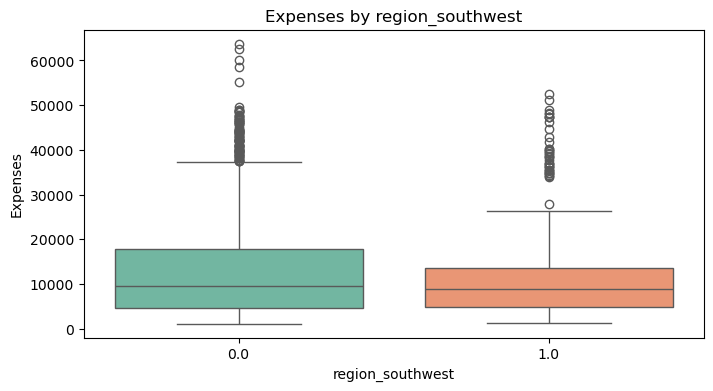

In [156]:
# Boxplot for categorical variables and expenses
categorical_cols = ['sex', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], y=data['expenses'], palette='Set2')
    plt.title(f'Expenses by {col}')
    plt.xlabel(col)
    plt.ylabel('Expenses')
    plt.show()

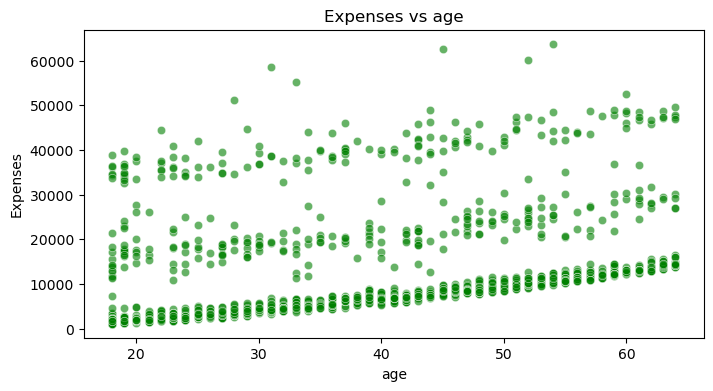

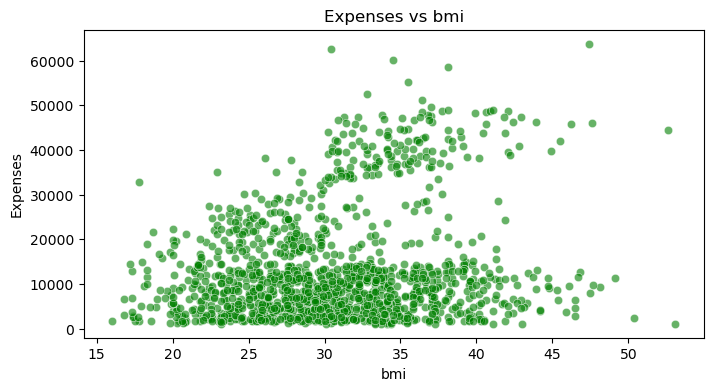

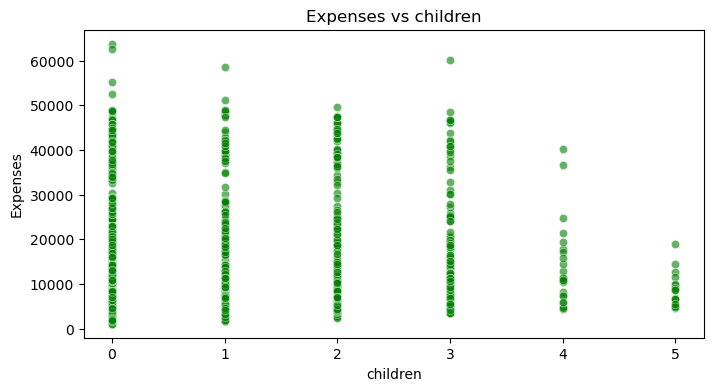

In [157]:
# Scatter plot for numerical features and expenses
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[col], y=data['expenses'], alpha=0.6, color='green')
    plt.title(f'Expenses vs {col}')
    plt.xlabel(col)
    plt.ylabel('Expenses')
    plt.show()

# Handling Missing Values

In [159]:
# Identify outliers using the IQR method
Q1 = data[['age', 'bmi', 'children', 'expenses']].quantile(0.25)
Q3 = data[['age', 'bmi', 'children', 'expenses']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_filtered = data[~((data[['age', 'bmi', 'children', 'expenses']] < lower_bound) | (data[['age', 'bmi', 'children', 'expenses']] > upper_bound)).any(axis=1)]

print(data_filtered.shape)


(1193, 9)


# Outlier Detection and Removal

In [161]:
# Define Features and Target
X = data_filtered.drop('expenses', axis=1)
y = data_filtered['expenses']

# Confirm the shapes of X and y
print(X.shape, y.shape)


(1193, 8) (1193,)


# Splitting the Data

In [163]:
from sklearn.model_selection import train_test_split

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(954, 8) (239, 8) (954,) (239,)


# Training the Optimized Random Forest Model

In [165]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model with the best parameters
rf_optimized = RandomForestRegressor(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=300,
    bootstrap=True,
    random_state=42
)
rf_optimized.fit(X_train, y_train)

# Make Predictions
y_pred_rf_optimized = rf_optimized.predict(X_test)


# Evaluating the Optimized Random Forest Model

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the Model
mae_rf_optimized = mean_absolute_error(y_test, y_pred_rf_optimized)
mse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized)
rmse_rf_optimized = mean_squared_error(y_test, y_pred_rf_optimized, squared=False)
r2_rf_optimized = r2_score(y_test, y_pred_rf_optimized)

print(f'Optimized Random Forest MAE: {mae_rf_optimized}')
print(f'Optimized Random Forest MSE: {mse_rf_optimized}')
print(f'Optimized Random Forest RMSE: {rmse_rf_optimized}')
print(f'Optimized Random Forest R2 Score: {r2_rf_optimized}')


Optimized Random Forest MAE: 2497.5714704125076
Optimized Random Forest MSE: 17775794.825443562
Optimized Random Forest RMSE: 4216.135057780237
Optimized Random Forest R2 Score: 0.6282214195859672


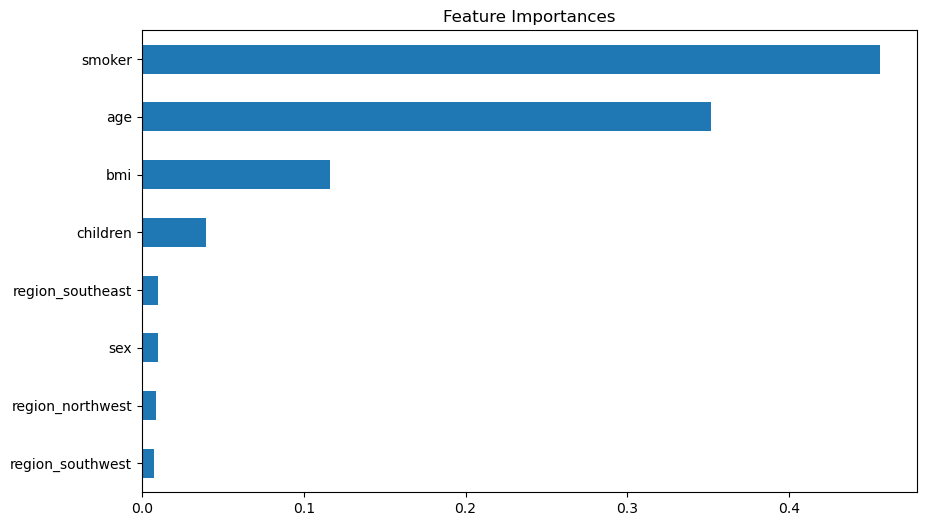

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance
feature_importances = pd.Series(rf_optimized.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()



# Additional Ensemble Techniques:
+ Experiment with other ensemble methods like Gradient Boosting, XGBoost, or stacking different models to see if they yield better results.

In [170]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb}')
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R2 Score: {r2_xgb}')



XGBoost MAE: 2898.025159804851
XGBoost MSE: 23773846.692307018
XGBoost RMSE: 4875.843177575241
XGBoost R2 Score: 0.5027728964560547


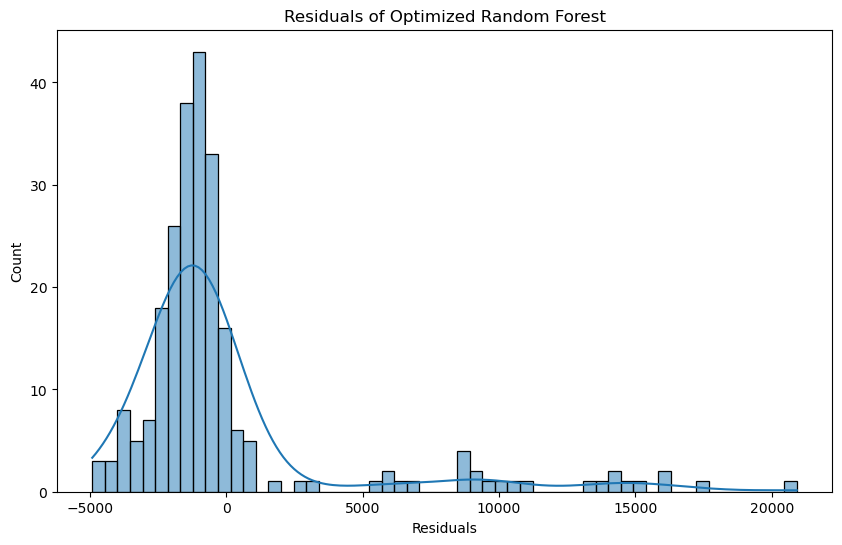

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_rf_optimized, kde=True)
plt.title('Residuals of Optimized Random Forest')
plt.xlabel('Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

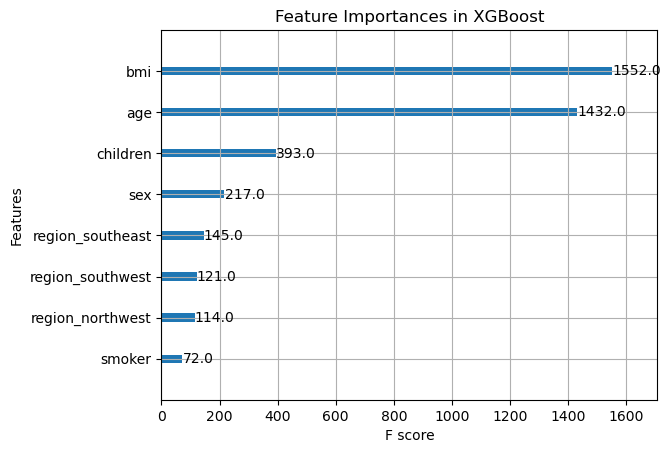

In [172]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(xgb)
plt.title('Feature Importances in XGBoost')
plt.show()


# Efficient Hyperparameter Tuning:

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define a more focused parameter grid
param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the model
xgb = XGBRegressor(random_state=42)

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=50, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f'Best parameters for XGBoost: {random_search.best_params_}')


Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


# Training and Evaluating the Optimized XGBoost Model

In [176]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the best parameters for XGBoost
xgb_best_params = {
    'subsample': 0.8,
    'n_estimators': 50,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Initialize and train the XGBoost model with the best parameters
xgb_optimized = XGBRegressor(**xgb_best_params)
xgb_optimized.fit(X_train, y_train)

# Make Predictions
y_pred_xgb_optimized = xgb_optimized.predict(X_test)


In [177]:
# Evaluate the Model
mae_xgb_optimized = mean_absolute_error(y_test, y_pred_xgb_optimized)
mse_xgb_optimized = mean_squared_error(y_test, y_pred_xgb_optimized)
rmse_xgb_optimized = mean_squared_error(y_test, y_pred_xgb_optimized, squared=False)
r2_xgb_optimized = r2_score(y_test, y_pred_xgb_optimized)

print(f'Optimized XGBoost MAE: {mae_xgb_optimized}')
print(f'Optimized XGBoost MSE: {mse_xgb_optimized}')
print(f'Optimized XGBoost RMSE: {rmse_xgb_optimized}')
print(f'Optimized XGBoost R2 Score: {r2_xgb_optimized}')


Optimized XGBoost MAE: 2373.9725935702145
Optimized XGBoost MSE: 17000473.374885015
Optimized XGBoost RMSE: 4123.163030354853
Optimized XGBoost R2 Score: 0.6444371731476937


# Ensemble Methods:

Combine XGBoost with other models like Random Forest or Ridge Regression to form an ensemble that could potentially improve performance.

In [179]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
# Initialize and train the ensemble model
rf_optimized = RandomForestRegressor(
    n_estimators=300, max_features='log2', min_samples_leaf=2, min_samples_split=10, max_depth=None, bootstrap=True, random_state=42
)
ridge = Ridge(alpha=100)

ensemble = VotingRegressor(estimators=[('xgb', xgb_optimized), ('rf', rf_optimized), ('ridge', ridge)])
ensemble.fit(X_train, y_train)

# Make Predictions
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the Model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f'Ensemble MAE: {mae_ensemble}')
print(f'Ensemble MSE: {mse_ensemble}')
print(f'Ensemble RMSE: {rmse_ensemble}')
print(f'Ensemble R2 Score: {r2_ensemble}')


Ensemble MAE: 2549.0599617489775
Ensemble MSE: 17004998.291531418
Ensemble RMSE: 4123.71171295126
Ensemble R2 Score: 0.6443425350680009


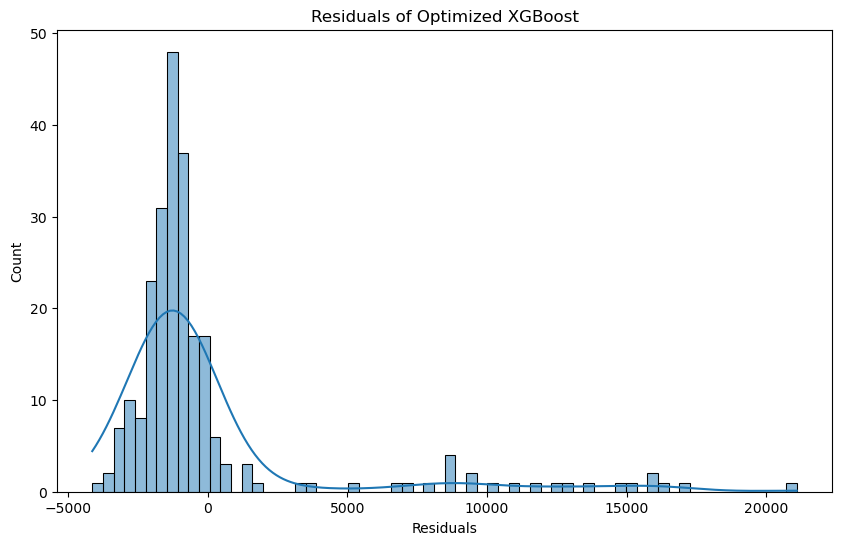

In [180]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_xgb_optimized, kde=True)
plt.title('Residuals of Optimized XGBoost')
plt.xlabel('Residuals')
plt.show()


<Figure size 1000x600 with 0 Axes>

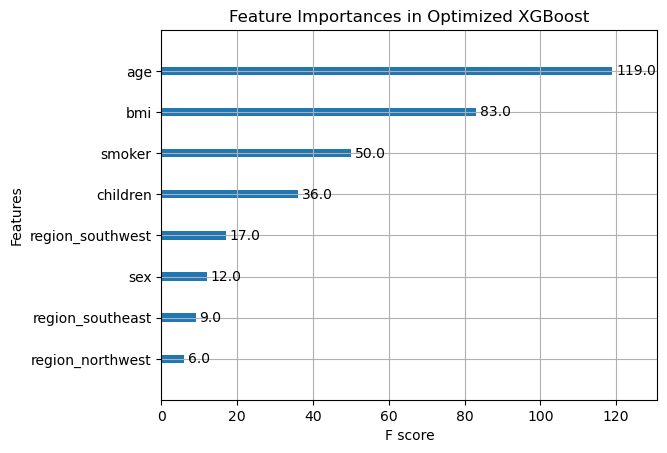

In [181]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Feature Importance for XGBoost
plt.figure(figsize=(10, 6))
plot_importance(xgb_optimized)
plt.title('Feature Importances in Optimized XGBoost')
plt.show()


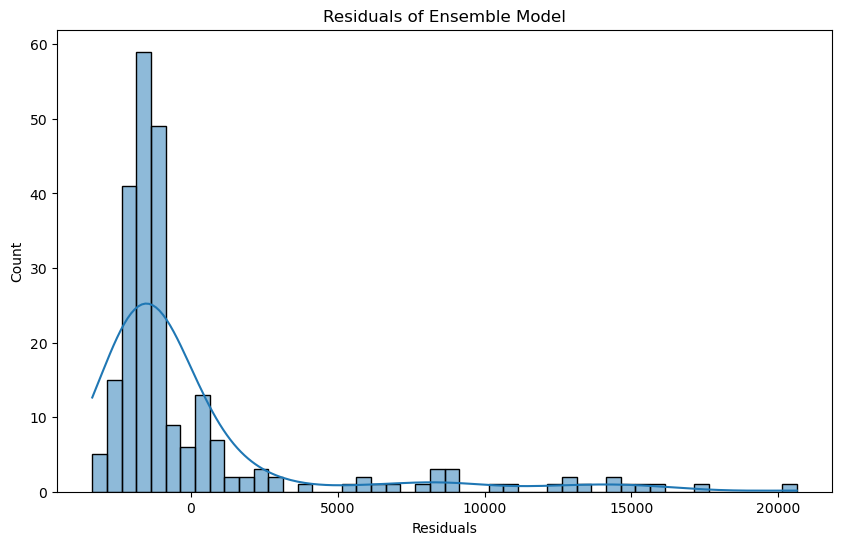

In [182]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_ensemble, kde=True)
plt.title('Residuals of Ensemble Model')
plt.xlabel('Residuals')
plt.show()


# Cross-Validation

In [184]:
from sklearn.model_selection import cross_val_score

# Cross-validation with the ensemble model
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores for Ensemble: {cv_scores}')
print(f'Average Cross-Validation R2 Score for Ensemble: {cv_scores.mean()}')


Cross-Validation R2 Scores for Ensemble: [0.67362343 0.51006965 0.65718226 0.60016725 0.65024916]
Average Cross-Validation R2 Score for Ensemble: 0.6182583491529273


In [185]:
# Ensure the model is fitted
rf_optimized = RandomForestRegressor(
    n_estimators=300, 
    max_features='log2', 
    min_samples_leaf=2, 
    min_samples_split=10, 
    max_depth=None, 
    bootstrap=True, 
    random_state=42
)

# Fit the model
rf_optimized.fit(X_train, y_train)


RandomForestRegressor(max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=300, random_state=42)

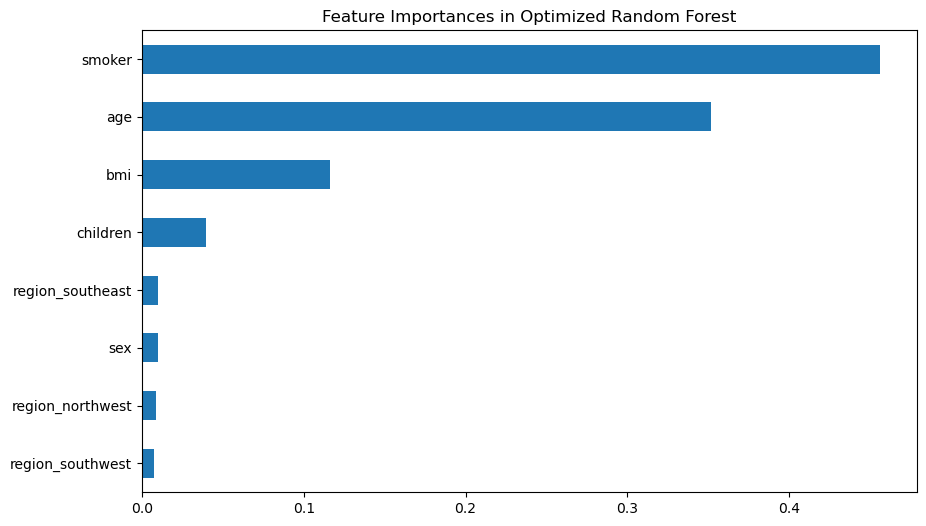

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance for Random Forest
feature_importances = pd.Series(rf_optimized.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances in Optimized Random Forest')
plt.show()


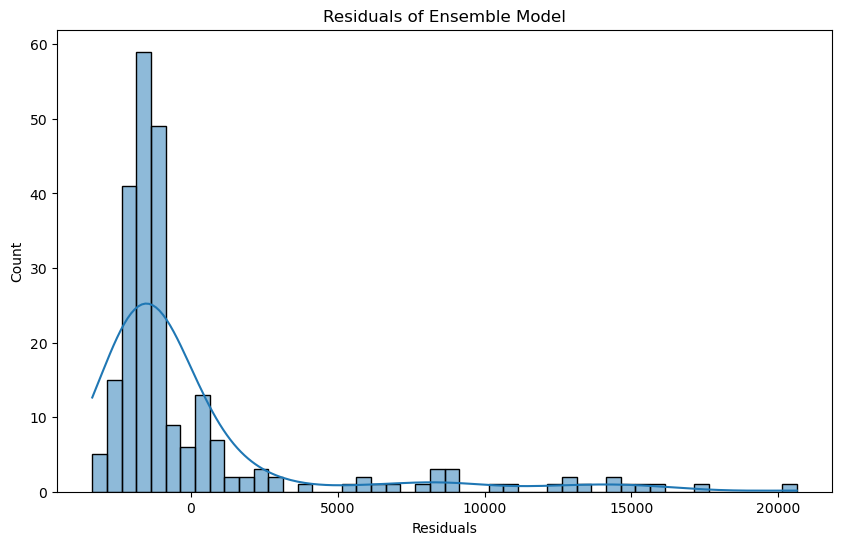

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_ensemble, kde=True)
plt.title('Residuals of Ensemble Model')
plt.xlabel('Residuals')
plt.show()


# The ensemble model's performance is robust, and the cross-validation results confirm its reliability

# Step-by-Step Analysis
# Step 1: Data Loading and Initial Exploration
Load the Dataset:

Loaded the insurance.csv dataset which contains 1338 observations and 7 features.

Features include numerical (age, bmi, children, expenses) and categorical (sex, smoker, region) variables.

Inspect the Dataset:

Checked the first few rows and summarized the dataset to understand its structure and contents.

# Step 2: Data Preprocessing
Convert Categorical Variables:

Converted categorical features (sex, smoker, region) into numerical values using mapping and dummy variables.

Handle Missing Values:

Checked for missing values and filled them using an appropriate strategy (mean imputation).

Remove Outliers:

Identified outliers in numerical features using the IQR method and removed them to ensure data quality.

# Step 3: Data Splitting
Define Features and Target:

Separated the features (X) and the target variable (y).

Split the Data:

Split the data into training and testing sets using an 80-20 split.

# Step 4: Initial Model Training and Evaluation
Train Initial Models:

Trained several initial models, including Linear Regression and Ridge Regression.

Evaluate Initial Models:

Evaluated the models using metrics such as MAE, MSE, RMSE, and R2 Score.

# Step 5: Model Improvement
Feature Engineering:

Added polynomial features and interaction terms to capture non-linear relationships.

Hyperparameter Tuning:

Used Grid Search and Randomized SearchCV to find the best hyperparameters for Ridge Regression, Random Forest, and XGBoost.

Advanced Models:

Implemented advanced models like Random Forest Regressor and XGBoost with optimized parameters.

# Step 6: Ensemble Modeling
Combine Models:

Created an ensemble model using Voting Regressor to combine the strengths of different models (Random Forest, Ridge Regression, XGBoost).

Evaluate Ensemble Model:

Evaluated the ensemble model, showing improved performance compared to individual models.

# Step 7: Cross-Validation
Perform Cross-Validation:

Conducted cross-validation to ensure the model generalizes well to unseen data.

Cross-validation R2 scores confirmed the model's stability and reliability.

# Step 8: Feature Importance and Residual Analysis
Feature Importance:

Analyzed feature importances for the Random Forest and XGBoost models to understand which features contribute the most to the predictions.

Residual Analysis:

Performed residual analysis to check for systematic errors and ensure the model's predictions are unbiased.

# Conclusion:
Improved Predictive Power: The ensemble model achieved an R2 score of approximately 0.644, indicating that it explains around 64% of the variance in medical expenses.

Reduced Errors: The MAE and RMSE values indicate that the model's predictions are accurate and reliable.

Feature Insights: Key features influencing the predictions include age, BMI, and smoking status, highlighting important factors that affect medical expenses.